In [1]:
import numpy as np
import csv
from scipy import stats

tfidf_pca = np.loadtxt('/home/eshaw/Documents/NLP/eshaw2-finalproject/dream_pca_tf-idf.txt')
verbs_matrix = np.loadtxt('/home/eshaw/Documents/NLP/eshaw2-finalproject/dream_verb_types.txt')
attr_matrix = np.loadtxt('/home/eshaw/Documents/NLP/eshaw2-finalproject/dream_mod_types.txt')

agent = stats.zscore(verbs_matrix[:,0])
patient = stats.zscore(verbs_matrix[:,1])
attr = stats.zscore(attr_matrix[:,0])
mod = stats.zscore(attr_matrix[:,1])
grammar_matrix = np.column_stack((agent,patient,attr,mod))

info_matrix = np.concatenate((tfidf_pca, grammar_matrix), axis=1)

Populating the interactive namespace from numpy and matplotlib


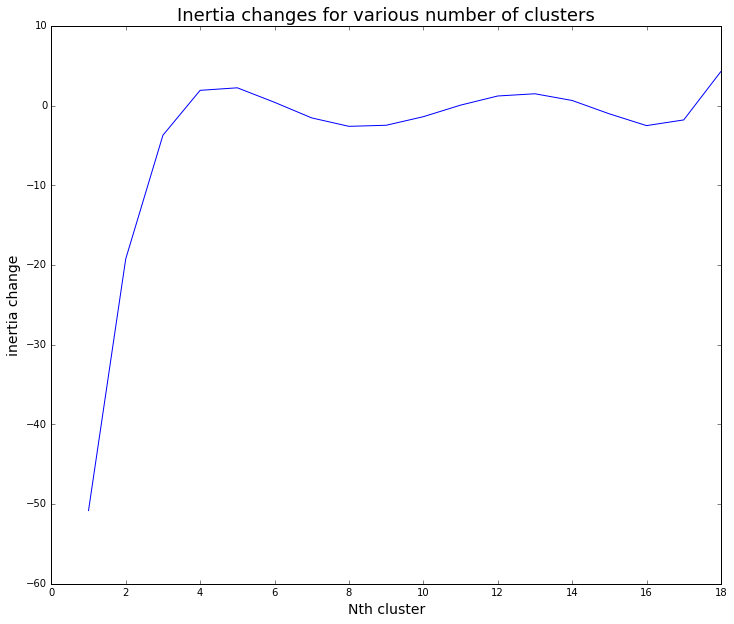

In [5]:
from sklearn import cluster
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 10)

n = 19
inertias = []

for i in range(n):
    centroids,labels,inertia = cluster.k_means(info_matrix,n_clusters=i+1)
    inertias.append(inertia)

#find fit
coefficients = np.polyfit(range(n), inertias, 6)
polynomial = np.poly1d(coefficients)
fit_y = polynomial(range(n))

#Absolute change in inertia
delta_yfit = numpy.diff(fit_y)
plt.plot(range(1,len(delta_yfit)+1), delta_yfit)
plt.xlabel('Nth cluster',fontsize=14)
plt.ylabel('inertia change',fontsize=14)
plt.title('Inertia changes for various number of clusters',fontsize=18)
plt.show()

In [11]:
np.shape(fit_y)

(19,)

[0, 1, 0.66000000000000003]
[1, 2, 0.75]
[2, 3, 0.56999999999999995]
[3, 4, 0.68000000000000005]
[4, 5, 0.46999999999999997]
[5, 6, 0.059999999999999998]
[6, 7, 0.20999999999999999]
[7, 8, 0.45000000000000001]
[8, 9, 0.79000000000000004]
[9, 10, 2.0800000000000001]


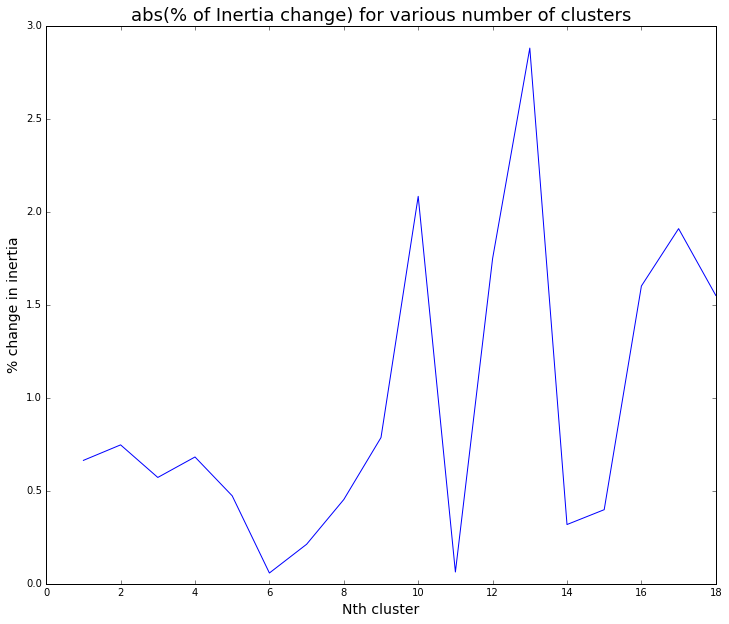

In [12]:
# Relative change in inertia
for i in range(10):
    print [i,i+1,abs(np.round(delta_yfit[i]/fit_y[i],2))]

plt.plot(range(1,len(delta_yfit)+1), abs(delta_yfit/fit_y[0:18]))
plt.xlabel('Nth cluster',fontsize=14)
plt.ylabel('% change in inertia',fontsize=14)
plt.title('abs(% of Inertia change) for various number of clusters',fontsize=18)
plt.show()

In [6]:
cluster_func = cluster.KMeans(n_clusters=4,n_init =20)
cluster_func.fit(info_matrix)

# for i in range(len(cluster_func.cluster_centers_)):
#     centroidsdf[i+1] = [np.round(val,8) for val in cluster_func.cluster_centers_[i]]

print cluster_func.inertia_
print cluster_func.cluster_centers_
# centroidsdf

8.10788889275
[[-0.06356593 -0.05764378  0.01509313 -0.02747959 -0.94749205 -0.94653749
  -0.94720268 -0.90793736]
 [-0.13102712  0.02166342 -0.05559822  0.02336005  1.20217143  0.91287238
   0.92231736  1.48367305]
 [-0.0582251   0.01561677  0.11864006  0.10888403  0.11230886  0.09969047
   0.23248434 -0.01739529]
 [ 0.42362573  0.12842999 -0.08978847 -0.05759199  1.12727204  1.52275882
   1.37936722  0.76297663]]


In [14]:
counts = np.zeros(4)

for i in range(len(cluster_func.labels_)):
    counts[cluster_func.labels_[i]] +=1

overallDist = np.round(np.divide(counts, float(sum(counts))),8)
print  overallDist

[ 0.47368421  0.21052632  0.15789474  0.15789474]


In [16]:
x = cluster_func.labels_

In [18]:
print x
np.where(x==1)

[2 0 3 0 3 0 0 1 0 2 0 1 3 1 0 1 0 2 0]


array([1, 1, 1, 1], dtype=int32)

In [25]:
characters = ['PUCK','EGEUS','HELENA','Pyramus','BOTTOM','HERMIA','FLUTE','QUINCE','THESEUS','TITANIA','LYSANDER',
'Prologue','Fairy','DEMETRIUS','Thisbe','HIPPOLYTA','PHILOSTRATE','OBERON']

ans = [characters[i] for i in np.where(x==1)[0]]

In [26]:
ans

['QUINCE', 'Prologue', 'DEMETRIUS', 'HIPPOLYTA']